# convert mask to polygon

curb         0.509271
road         0.063356
road_line    0.014020
vehicle      0.413353
dtype: float64
[1 1 1 ... 1 1 1]


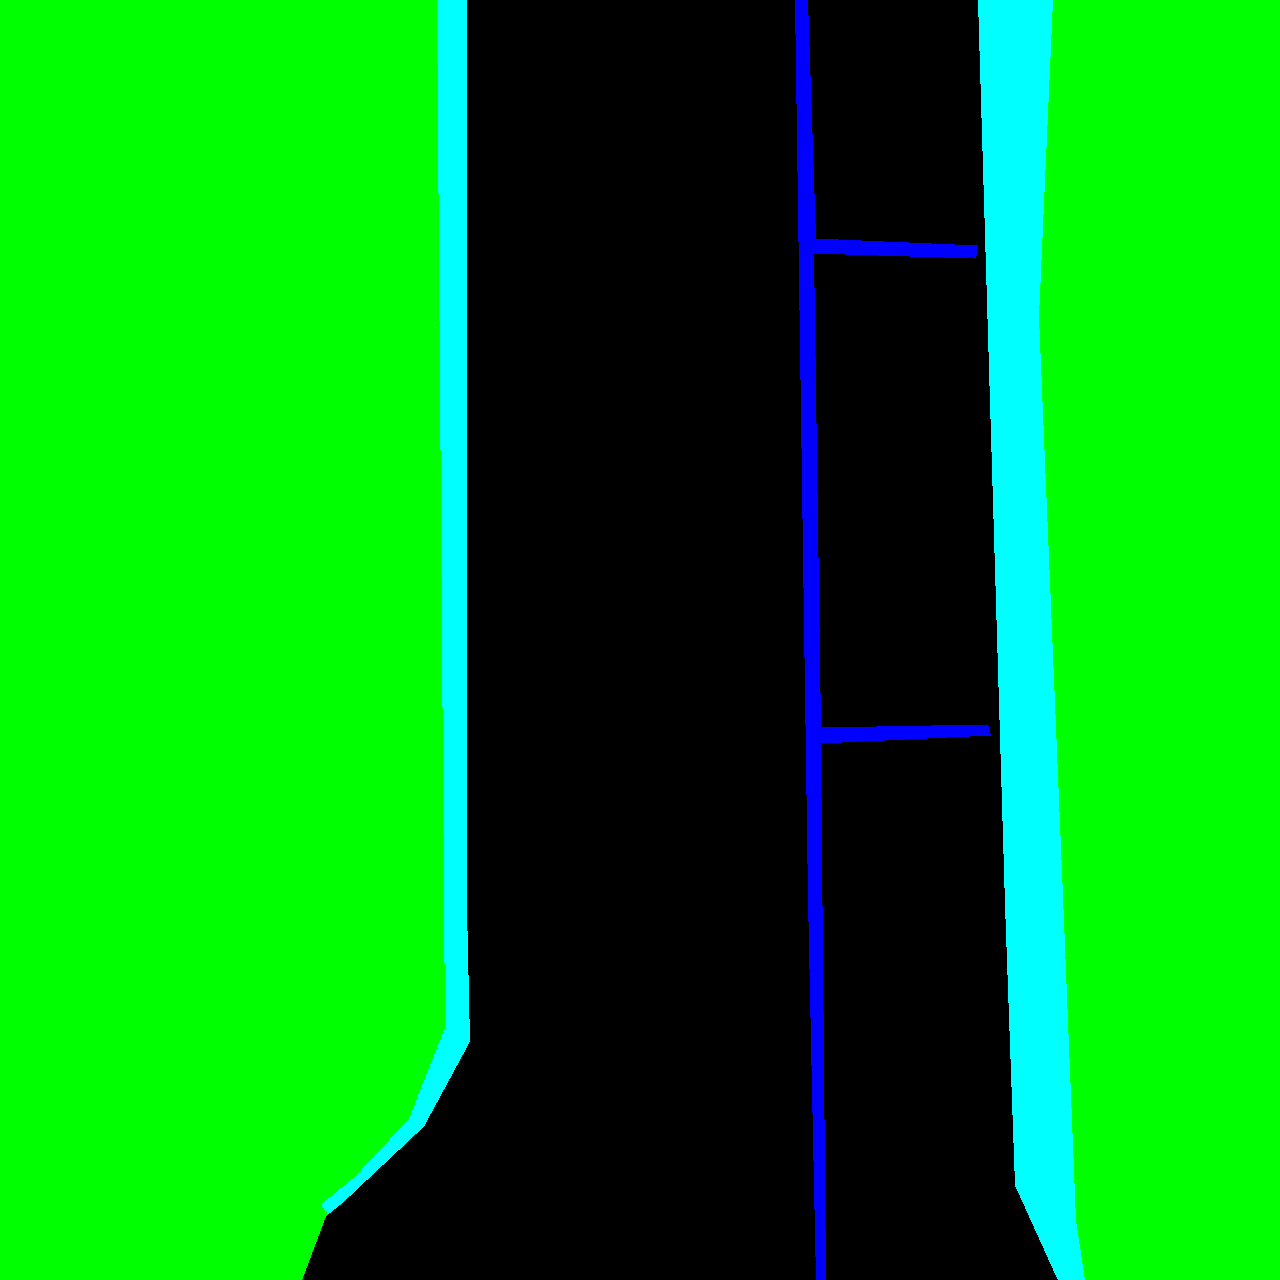

In [1]:
from PIL import Image, ImagePalette
import glob, os, random
import numpy as np
import pandas as pd

CLASSES = ('road', 'curb', 'obstacle', 'chock', 'parking_line', 'road_line', 'vehicle')
PALETTE = [(0, 0, 0), (0, 255, 255), (0, 255, 0), (255, 0, 0), (0, 0, 255), (0, 128, 255), (128, 128, 128)]

pl_base = 'data/parkinglot/'
parkinglot_list = glob.glob(pl_base+'labels/*.png')
path = random.sample(parkinglot_list, 1)[0]
img_path = pl_base+'images/'+path.split('/')[-1].split('.')[0]+'.jpg'
seg_img = Image.open(path)
seg_mask = np.asarray(seg_img)

unique, counts = np.unique(seg_mask.flatten(), return_counts=True)
vc = {CLASSES[k]:v for (k,v) in zip(unique,counts)}
vc = pd.Series(vc).sort_index()
# vc.plot(kind='bar')
print(vc/vc.sum())
print(seg_mask[0])
seg_img

In [2]:
seg_mask==1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [3]:
import json
import numpy as np
from pycocotools import mask
from skimage import measure

ground_truth_binary_mask = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=np.uint8)
ground_truth_binary_mask = np.where(seg_mask==1, 1, 0)

# fortran_ground_truth_binary_mask = np.asfortranarray(ground_truth_binary_mask)
# encoded_ground_truth = mask.encode(fortran_ground_truth_binary_mask)
# ground_truth_area = mask.area(encoded_ground_truth)
# ground_truth_bounding_box = mask.toBbox(encoded_ground_truth)
contours = measure.find_contours(ground_truth_binary_mask, 0.5)
# contours = measure.approximate_polygon(contours, 10)

annotation = {
        "segmentation": [],
        # "area": ground_truth_area.tolist(),
        "iscrowd": 0,
        "image_id": 123,
        # "bbox": ground_truth_bounding_box.tolist(),
        "category_id": 1,
        "id": 1
    }

for contour in contours:
    contour = np.flip(contour, axis=1)
    segmentation = contour.ravel().tolist()
    annotation["segmentation"].append(segmentation)
    
print(annotation)

1261.0, 1081.5, 1260.0, 1081.5, 1259.0, 1081.5, 1258.0, 1081.5, 1257.0, 1081.0, 1256.5, 1080.5, 1256.0, 1080.5, 1255.0, 1080.5, 1254.0, 1080.5, 1253.0, 1080.5, 1252.0, 1080.5, 1251.0, 1080.5, 1250.0, 1080.0, 1249.5, 1079.5, 1249.0, 1079.5, 1248.0, 1079.5, 1247.0, 1079.5, 1246.0, 1079.5, 1245.0, 1079.5, 1244.0, 1079.0, 1243.5, 1078.5, 1243.0, 1078.5, 1242.0, 1078.5, 1241.0, 1078.5, 1240.0, 1078.5, 1239.0, 1078.5, 1238.0, 1078.5, 1237.0, 1078.0, 1236.5, 1077.5, 1236.0, 1077.5, 1235.0, 1077.5, 1234.0, 1077.5, 1233.0, 1077.5, 1232.0, 1077.5, 1231.0, 1077.5, 1230.0, 1077.0, 1229.5, 1076.5, 1229.0, 1076.5, 1228.0, 1076.5, 1227.0, 1076.5, 1226.0, 1076.5, 1225.0, 1076.5, 1224.0, 1076.0, 1223.5, 1075.5, 1223.0, 1075.5, 1222.0, 1075.5, 1221.0, 1075.5, 1220.0, 1075.5, 1219.0, 1075.5, 1218.0, 1075.5, 1217.0, 1075.5, 1216.0, 1075.5, 1215.0, 1075.5, 1214.0, 1075.5, 1213.0, 1075.5, 1212.0, 1075.5, 1211.0, 1075.5, 1210.0, 1075.5, 1209.0, 1075.5, 1208.0, 1075.0, 1207.5, 1074.5, 1207.0, 1074.5, 1206.0, 

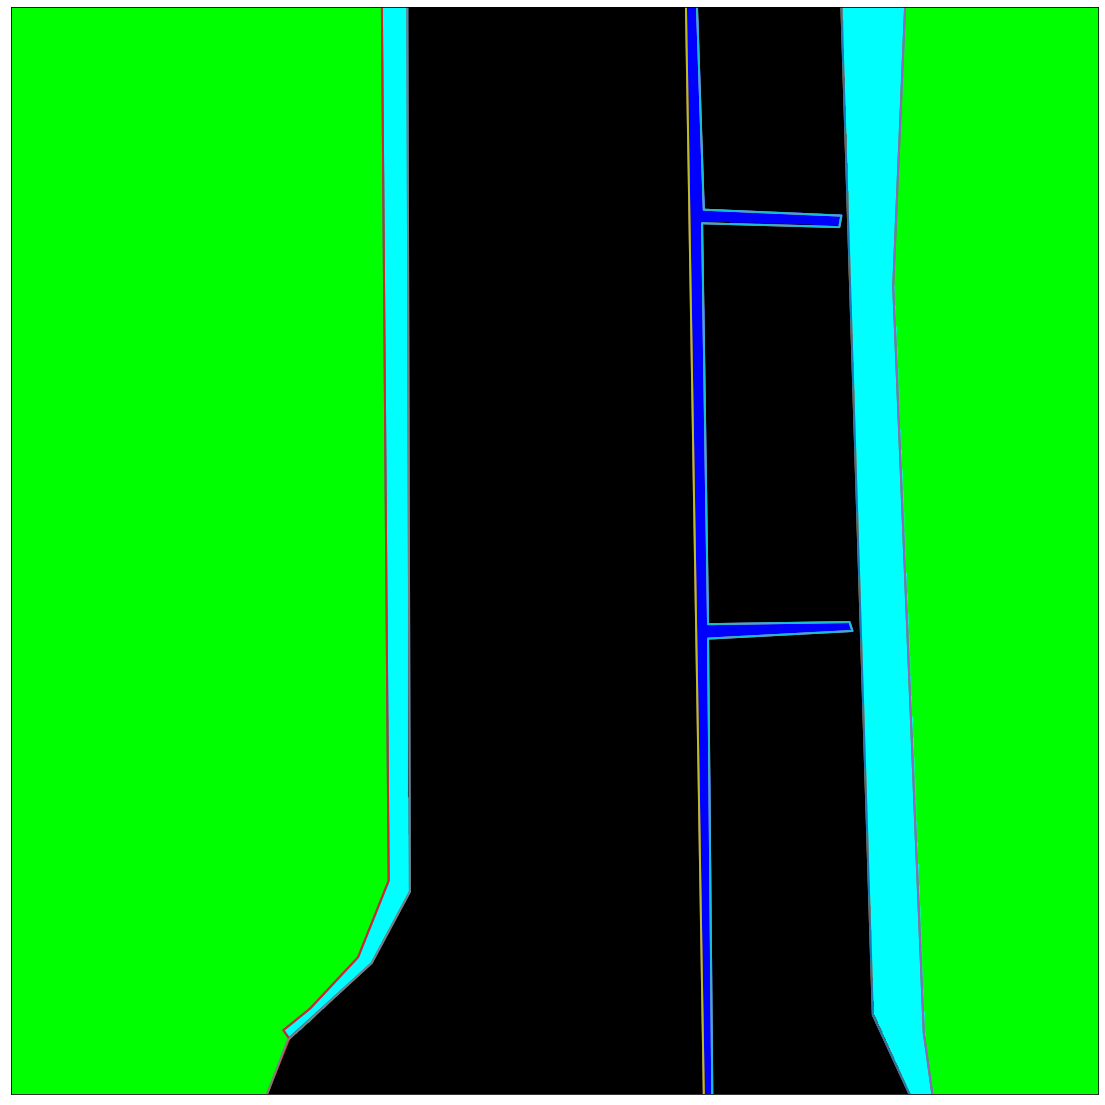

In [10]:
import matplotlib.pyplot as plt
# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(seg_img)

for i in range(len(CLASSES)):
    ground_truth_binary_mask = np.where(seg_mask==i, 1, 0)
    contours = measure.find_contours(ground_truth_binary_mask, 0.5)
    # contours = np.array(contours)
    if len(contours)==0:
        continue
    for contour in contours:
        contour = measure.approximate_polygon(contour, 3)
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('seg_result.png', bbox_inches = 'tight', pad_inches = 0)
# plt.show()
# plt.close(fig)
ax

In [5]:
from skimage.data import coins
from skimage.morphology import label
from skimage.measure import regionprops
img = coins() > 110
label_img = label(img)
props = regionprops(label_img)
props[0]['Centroid'] # centroid of first labelled object

(22.72987986048314, 81.91228523446583)

14


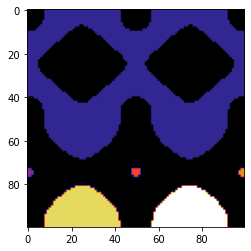

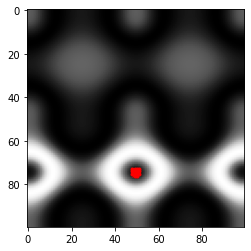

In [6]:
from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Coordinates of point of interest
pt = [(49,75)]

# Apply thresholding to the surface
threshold = 0.8
blobs = r > threshold

# Make a labelled image based on the thresholding regions
blobs_labels = measure.label(blobs, background = 0)

# Show the thresholded regions
plt.figure()
plt.imshow(blobs_labels, cmap='CMRmap')

# Apply regionprops to charactersie each of the regions
props = measure.regionprops(blobs_labels, intensity_image = r)

# Loop through each region in regionprops, identify if the point of interest is
# in that region. If so, plot the region and print it's area.
plt.figure()
plt.imshow(r, cmap='Greys')
plt.plot(pt[0][0], pt[0][1],'rx')
for prop in props:
    coords = prop.coords
    if np.sum(np.all(coords[:,[1,0]] == pt[0], axis=1)):
        plt.plot(coords[:,1],coords[:,0],'r.')
        print(prop.area)

there are 2 polygons


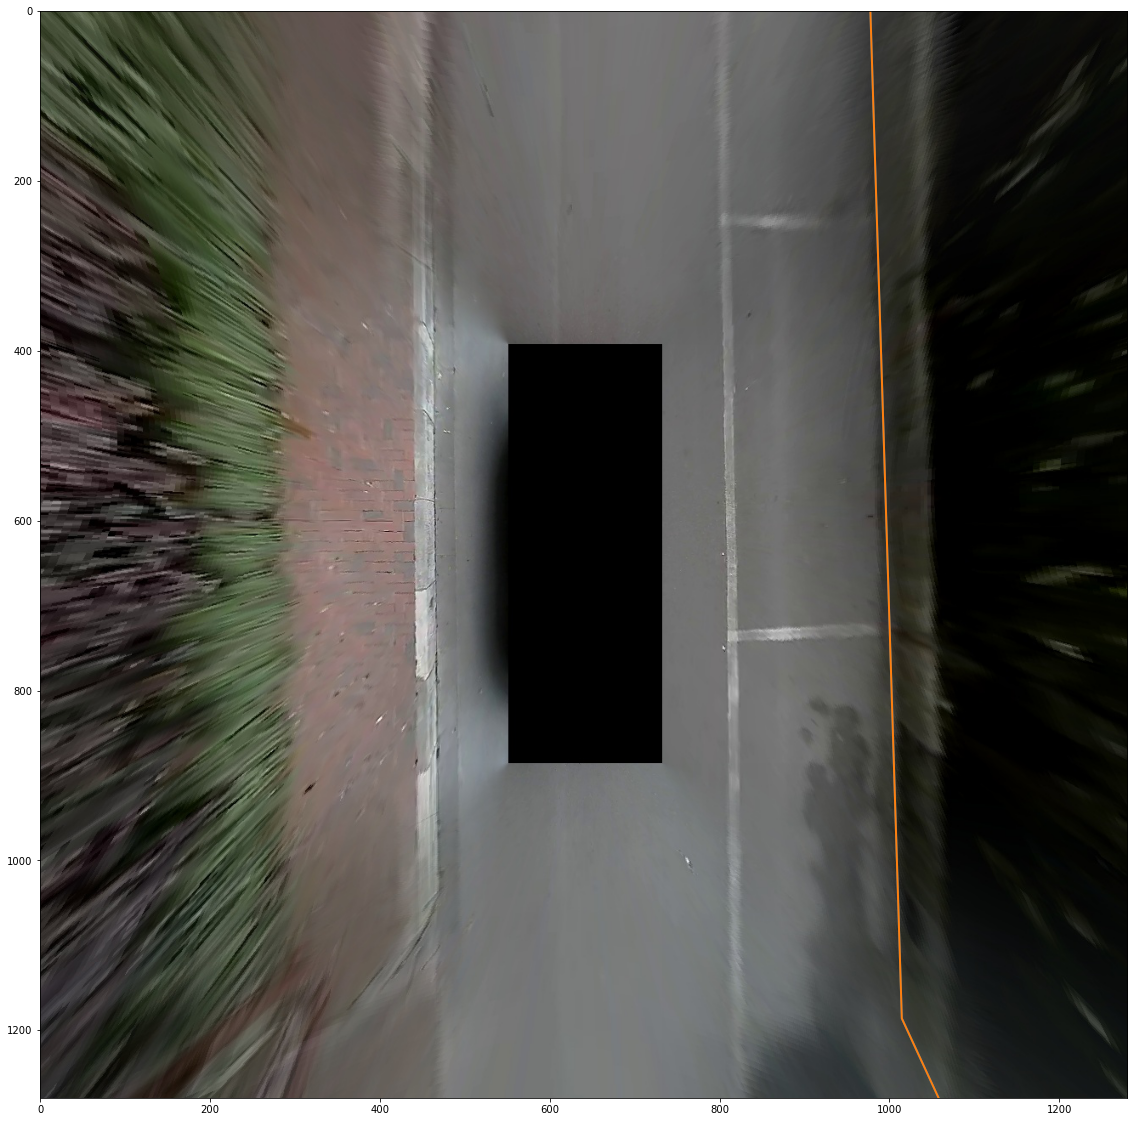

In [14]:
## Use imantics

from imantics import Polygons, Mask, BBox
from PIL import ImageDraw, ImageFont
mask = mask = np.where(seg_mask==1, 1, 0)
regions = Mask(mask).polygons().points
img = Image.open(img_path)
# draw = ImageDraw.Draw(img)
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img)
# fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 20)
print(f'there are {len(regions)} polygons')
for polygon in regions:
    polygon2 = measure.approximate_polygon(polygon, 10)
    # draw.polygon(polygon2, fill='red')
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
# img

In [27]:
## imantics
from imantics import Annotation, Polygons, Mask, Image
mask = Mask(seg_img)
mask.polygons().points

[array([[1053,    0],
        [1053,   11],
        [1052,   12],
        [1052,   33],
        [1051,   34],
        [1051,   56],
        [1050,   57],
        [1050,   79],
        [1049,   80],
        [1049,  101],
        [1048,  102],
        [1048,  124],
        [1047,  125],
        [1047,  146],
        [1046,  147],
        [1046,  169],
        [1045,  170],
        [1045,  191],
        [1044,  192],
        [1044,  214],
        [1043,  215],
        [1043,  237],
        [1042,  238],
        [1042,  259],
        [1041,  260],
        [1041,  282],
        [1040,  283],
        [1040,  304],
        [1039,  305],
        [1039,  328],
        [1040,  329],
        [1040,  352],
        [1041,  353],
        [1041,  376],
        [1042,  377],
        [1042,  400],
        [1043,  401],
        [1043,  424],
        [1044,  425],
        [1044,  448],
        [1045,  449],
        [1045,  473],
        [1046,  474],
        [1046,  497],
        [1047,  498],
        [1